In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Оценка стоимости автомобилей

Представим, что существует потребность продать или купить автомобиль. Рассматривается следующий вопрос: какая цена для данного автомобиля будет справедливой. В первом случае она поможет выставить цену в объявлении, а во втором - понять, справедлива цена для данного агрегата или нет.

Данные взяты с портала `kaggle`: датасет `Car Sales` (https://www.kaggle.com/datasets/ekibee/car-sales-information).

## Чтение данных

In [2]:
ds_source = pd.read_csv('all_regions.csv')

In [3]:
print(ds_source.shape)
ds_source.head()

(1294757, 18)


,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00


Датасет содержит данные по почти полутора миллионам объявлений с популярного сайта. Будем работать только с объявлениями из Нижнего Новгорода: для конкретного города предсказание цены будет более полезным, т.к. цены в разных городах и регионах могут отличаться в зависимости от специфики. Поэтому отфильтруем данные по полю `location`. С этими данными и будем работать.

In [4]:
ds = ds_source[ds_source.location == 'Нижний Новгород']
ds.reset_index(drop=True, inplace=True)
print(ds.shape)
ds.head()

(10657, 18)


,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Лада,Нива Тревел,Джип 5 дв.,Зеленый,Бензин,2022.0,NaN,Механика,80.0,1209900,1.7 MT Black’22,ВАЗ-2123,1.7 LTR,2023-04-22 00:00:00,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,NaN,2023-05-01 23:00:00
1,Chrysler,300C,Седан,Серый,Бензин,2007.0,128000.0,АКПП,177.0,825000,2.7 AT,EES,2.7 LTR,2023-04-22 00:00:00,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chrysler/300c...,Автомобиль в отличном состоянии. Есть окрас пе...,2023-05-01 23:00:00
2,Toyota,Probox,Универсал,Белый,Бензин,2018.0,104000.0,Вариатор,109.0,1140000,1.5 GL,1NZ-FE,1.5 LTR,2023-04-22 00:00:00,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00
3,Toyota,Sienta,Минивэн,Красный,Бензин,NaN,88000.0,Вариатор,74.0,1430000,NaN,NaN,NaN,2023-04-22 00:00:00,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/sienta...,автомобиль в отличном техническом и внешнем со...,2023-05-01 23:00:00
4,Chery,indiS S18D,Хэтчбек 5 дв.,Серый,Бензин,NaN,102000.0,Механика,83.0,310000,NaN,NaN,NaN,2023-04-22 00:00:00,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/indis/4...,Комфортный автомобиль. Удачный универсальный в...,2023-05-01 23:00:00


Теперь осталось около 11 тысяч объектов. С этими данными и будем работать.

Разберём значения признаков.

In [5]:
print(ds.columns)
print(len(ds.columns))

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'date', 'location', 'link', 'description',
       'parse_date'],
      dtype='object')
18


Опишем каждый из признаков:
- `brand` - название марки автомобиля
- `name` - название модели автомобиля
- `bodyType` - тип кузова автомобиля (`Хэтчбек 5 дв.`, `Хэтчбек 3 дв.`, `Лифтбек` и т.д.)
- `color` - цвет кузова автомобиля
- `fuelType` - тип двигателя автомобиля (`Бензин`, `Дизель`, `Электро`)
- `year` - год выпуска автомобиля
- `mileage` - пробег автомобиля в километрах
- `transmission` - тип трансмиссии автомобиля (`Автомат`, `Вариатор`, `Механика` и т.д.)
- `power` - мощность двигателя автомобиля в лошадиных силах
- `price` - заявленная стоимость автомобиля в российских рублях
- `vehicleConfiguration` - название комплектации автомобиля
- `engineName` - модель двигателя автомобиля
- `engineDisplacement` - объём двигателя в литрах
- `date` - дата создания объявления
- `location` - город продажи (`Нижний Новгород`)
- `link` - ссылка на объявление (многие из них до сих пор рабочие, и на них можно перейти и посмотреть)
- `description` - текст объявления
- `parse_date` - дата парсинга объявления

Среди признаков фигурируют как категориальные (напр., `brand`, `name`, `nameType`), так и количественные (напр., `mileage`, `power`, `engineDisplacement`, целевой признак `price`). Также есть и текстовый признак - `description`.

Приведём категориальные, количественные и временные признаки к соответствующим типам данных:

In [6]:
for sign in ['brand', 'name', 'bodyType', 'color', 'fuelType', 'transmission', 'vehicleConfiguration', 'engineName']:
    ds[sign] = ds[sign].astype('category')

for i in range(ds.shape[0]):
    old_value = ds.loc[i, 'engineDisplacement']
    if isinstance(old_value, str) and old_value.split()[1] == 'LTR':
        ds.loc[i, 'engineDisplacement'] = float(old_value.split()[0])
for sign in ['mileage', 'power', 'price', 'engineDisplacement', 'year']:
    ds[sign] = ds[sign].astype('float64')

ds['date'] = ds['date'].astype('datetime64[ns]')
ds['parse_date'] = ds['parse_date'].astype('datetime64[ns]')

C:\Users\User\AppData\Local\Temp\ipykernel_1012\873083274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[sign] = ds[sign].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_1012\873083274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[sign] = ds[sign].astype('category')
C:\Users\User\AppData\Local\Temp\ipykernel_1012\873083274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [7]:
ds['brand'].dtype

CategoricalDtype(categories=['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'BYD', 'Bentley',
                  'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
                  'Citroen', 'DW Hower', 'Dacia', 'Daewoo', 'Daihatsu',
                  'Datsun', 'Dodge', 'Dongfeng', 'EXEED', 'Fiat', 'Ford',
                  'GAC', 'Geely', 'Genesis', 'Great Wall', 'Haval', 'Honda',
                  'Hongqi', 'Hummer', 'Hyundai', 'Infiniti', 'Iran Khodro',
                  'Isuzu', 'JAC', 'Jaguar', 'Jeep', 'Jetour', 'Kaiyi', 'Kia',
                  'Land Rover', 'Lexus', 'Lifan', 'Luxgen', 'MINI', 'Maserati',
                  'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan',
                  'OMODA', 'Opel', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche',
                  'Ravon', 'Renault', 'Renault Samsung', 'Rover', 'SEAT',
                  'Saab', 'Scion', 'Skoda', 'Smart', 'SsangYong', 'Subaru',
                  'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'Vortex', 'ГА

Взглянем ещё раз на преобразованную таблицу:

In [8]:
ds

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Лада,Нива Тревел,Джип 5 дв.,Зеленый,Бензин,2022.0,NaN,Механика,80.0,1209900.0,1.7 MT Black’22,ВАЗ-2123,1.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,NaN,2023-05-01 23:00:00
1,Chrysler,300C,Седан,Серый,Бензин,2007.0,128000.0,АКПП,177.0,825000.0,2.7 AT,EES,2.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chrysler/300c...,Автомобиль в отличном состоянии. Есть окрас пе...,2023-05-01 23:00:00
2,Toyota,Probox,Универсал,Белый,Бензин,2018.0,104000.0,Вариатор,109.0,1140000.0,1.5 GL,1NZ-FE,1.5,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00
3,Toyota,Sienta,Минивэн,Красный,Бензин,NaN,88000.0,Вариатор,74.0,1430000.0,NaN,NaN,NaN,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/sienta...,автомобиль в отличном техническом и внешнем со...,2023-05-01 23:00:00
4,Chery,indiS S18D,Хэтчбек 5 дв.,Серый,Бензин,NaN,102000.0,Механика,83.0,310000.0,NaN,NaN,NaN,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/indis/4...,Комфортный автомобиль. Удачный универсальный в...,2023-05-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10652,Лада,Гранта,Универсал,Белый,Бензин,NaN,NaN,Механика,87.0,609000.0,NaN,NaN,NaN,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/granta/5...,Модель: Гранта Комплектация: Classic.ГОСПРОГРА...,2023-06-21 07:00:00
10653,Suzuki,Grand Vitara,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,106.0,480000.0,NaN,NaN,NaN,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/suzuki/grand_...,.ГОСПРОГРАММА с выгодой до 10 % только до 25.0...,2023-06-21 07:00:00
10654,Mercedes-Benz,C-Class,Седан,Синий,Бензин,NaN,NaN,Автомат,150.0,3648000.0,NaN,NaN,NaN,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/mercedes-benz...,Модель: C-Class Комплектация: C 180 Sport.ГОСП...,2023-06-21 07:00:00
10655,Haval,F7,Джип 5 дв.,Синий,Бензин,NaN,NaN,Робот,190.0,2105000.0,NaN,NaN,NaN,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/haval/f7/5141...,.Один владелец.Без ДТП. Отличное техническое с...,2023-06-21 07:00:00


Обратим внимание, что во многих столбцах есть пропущенные значения:

In [9]:
ds.isna().sum()

brand                      0
name                       0
bodyType                   0
color                    592
fuelType                  14
year                    6765
mileage                 4551
transmission              87
power                   1099
price                      0
vehicleConfiguration    6765
engineName              6801
engineDisplacement      6814
date                       0
location                   0
link                       0
description              463
parse_date                 0
dtype: int64

Для очень многих записей пропущено значение года, что связано, скорее всего, с неудачным парсингом объявлений при формировании датасета. Заглядывая наперёд, предположим, что без знания года автомобиля будет тяжело предсказать его стоимость. Поэтому оставим только записи с проставленным годом выпуска. И теперь можно привести колонку с годом к целочисленному типу.

In [10]:
ds = ds.dropna(subset=['year'])
ds.reset_index(drop=True, inplace=True)
ds['year'] = ds['year'].astype('int64')
ds

C:\Users\User\AppData\Local\Temp\ipykernel_1012\2363445144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['year'] = ds['year'].astype('int64')


,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Лада,Нива Тревел,Джип 5 дв.,Зеленый,Бензин,2022,NaN,Механика,80.0,1209900.0,1.7 MT Black’22,ВАЗ-2123,1.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,NaN,2023-05-01 23:00:00
1,Chrysler,300C,Седан,Серый,Бензин,2007,128000.0,АКПП,177.0,825000.0,2.7 AT,EES,2.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chrysler/300c...,Автомобиль в отличном состоянии. Есть окрас пе...,2023-05-01 23:00:00
2,Toyota,Probox,Универсал,Белый,Бензин,2018,104000.0,Вариатор,109.0,1140000.0,1.5 GL,1NZ-FE,1.5,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00
3,Kia,Ceed,Универсал,Синий,Бензин,2021,25000.0,АКПП,128.0,2090000.0,1.6 AT Comfort,G4FG,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cee~d/506...,В продаже Kia Ceed 2021 г. 1 собственник Ориги...,2023-05-01 23:00:00
4,Lifan,X60,Джип 5 дв.,Серебристый,Бензин,2017,27000.0,Механика,128.0,1150000.0,1.8 MT Comfort,LFB479Q,1.8,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lifan/x60/506...,В продаже Lifan X60 2018 г. 1 собственник Ориг...,2023-05-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,Toyota,Cresta,Седан,Белый,Бензин,1997,NaN,АКПП,140.0,199999.0,2.0 Super Lucent,1G-FE,2.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/cresta...,"После дтп, повреждена левая передняя сторона. ...",2023-06-21 15:00:00
3888,Chery,Tiggo 7 Pro,Джип 5 дв.,Красный,Бензин,2020,NaN,Вариатор,147.0,2650000.0,1.5 CVT Prestige,SQRE4T15C,1.5,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,Куплен у официального дилера в Нижнем Новгород...,2023-06-21 15:00:00
3889,Kia,Mohave,Джип 5 дв.,Серый,Дизель,2020,NaN,АКПП,249.0,6190000.0,3.0 AT 4WD Premium,D6EB,3.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/mohave/50...,Добрый день.В НАЛИЧИИ АБСОЛЮТНО НОВЫЙ .KIA MOH...,2023-06-21 20:00:00
3890,Лада,2115 Самара,Седан,Зеленый,Бензин,2007,NaN,Механика,81.0,215000.0,1.6 MT 21154-20-010,ВАЗ-21114,1.6,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/2115/514...,Продаю 2115 в достойном состоянии как по кузов...,2023-06-21 20:00:00


## Визуализация данных и вычисление основных характеристик

Для начала избавимся от выбросов. Будем отталкиваться от цены.

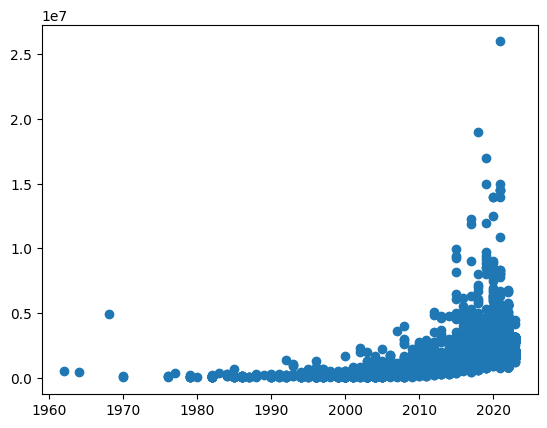

In [11]:
plt.scatter(ds['year'], ds['price'])

Избавимся от слишком старых автомобилей, т.к. для них действуют немного другие законы ценообразования:

In [12]:
ds = ds.drop(ds[ds.year <= 1980].index)

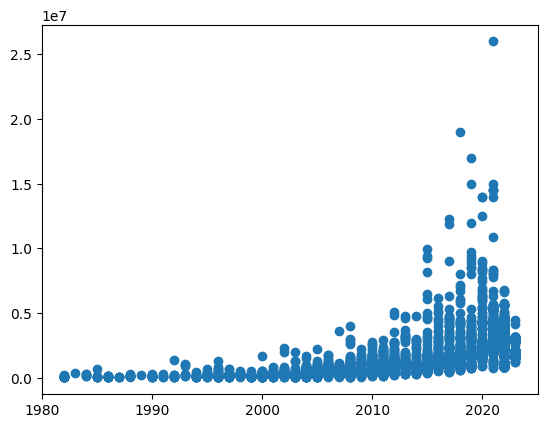

In [13]:
plt.scatter(ds['year'], ds['price'])

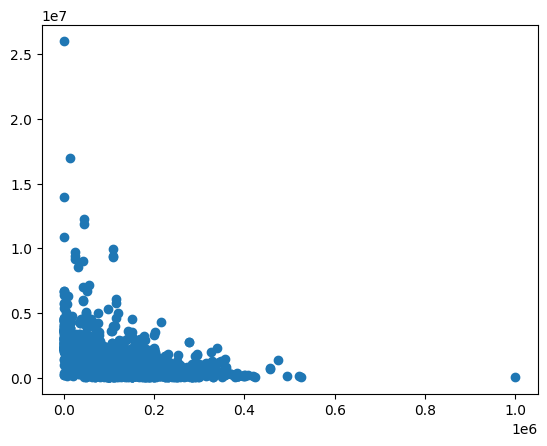

In [14]:
plt.scatter(ds['mileage'], ds['price'])

Пробег больше 420 тысяч км - из ряда вон выходящие случаи.

In [15]:
ds = ds.drop(ds[ds.mileage > 420000].index)

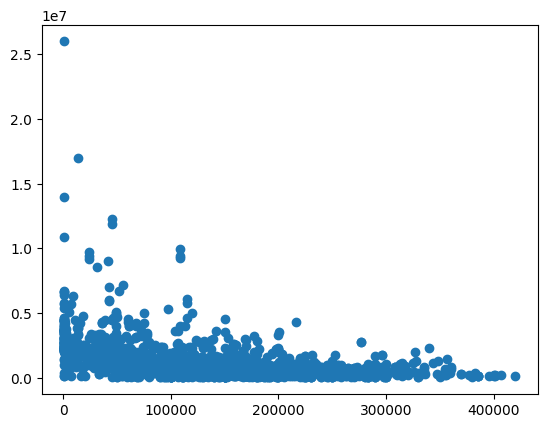

In [16]:
plt.scatter(ds['mileage'], ds['price'])

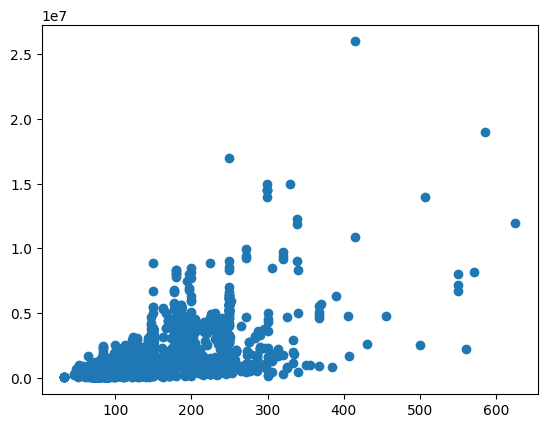

In [17]:
plt.scatter(ds['power'], ds['price'])

In [18]:
ds = ds.drop(ds[ds.power > 400].index)

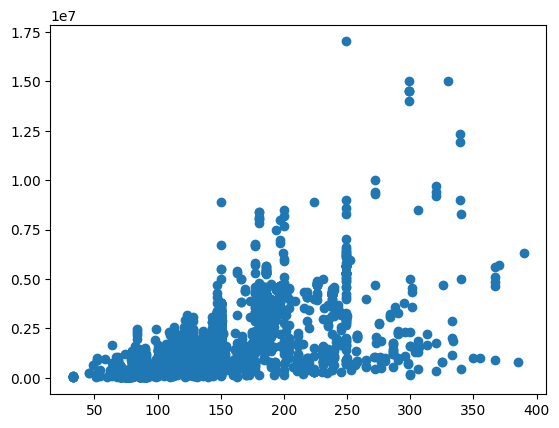

In [19]:
plt.scatter(ds['power'], ds['price'])

Избавились также от нескольких выбросов по мощности автомобиля. Избавимся ещё от самых дорогих и самых дешёвых автомобилей.

In [20]:
ds = ds[(ds.price < ds.price.quantile(0.995)) | (ds.price > ds.price.quantile(0.005))]

Сводная информация о числовых признаках теперь выглядит так:

In [21]:
ds.describe()

,year,mileage,power,price,engineDisplacement,date,parse_date
count,3853.000000,1639.000000,3840.000000,3.853000e+03,3807.000000,3853,3853
mean,2014.221126,132905.430140,143.383333,1.889855e+06,1.857841,2023-05-21 18:01:35.302361856,2023-05-25 18:56:28.839865088
min,1982.000000,1000.000000,33.000000,2.500000e+04,0.700000,2023-04-22 00:00:00,2023-05-01 23:00:00
25%,2008.000000,56000.000000,105.000000,5.700000e+05,1.500000,2023-05-06 00:00:00,2023-05-10 01:00:00
50%,2018.000000,130000.000000,147.000000,1.599000e+06,1.600000,2023-05-21 00:00:00,2023-05-27 14:00:00
75%,2022.000000,190000.000000,170.000000,2.889900e+06,2.000000,2023-06-06 00:00:00,2023-06-07 19:00:00
max,2023.000000,420000.000000,390.000000,1.699800e+07,5.700000,2023-06-21 00:00:00,2023-06-21 22:00:00
std,8.785632,89314.894568,50.892180,1.635352e+06,0.554015,NaN,NaN


Это была информация о количественных признаках после удаления выбросов: среднее значение, минимальное, максимальное, медиана и т.д. А вот информация и о категориальных признаках:

In [22]:
ds.describe(include=['category'])

,brand,name,bodyType,color,fuelType,transmission,vehicleConfiguration,engineName
count,3853,3853,3853,3617,3853,3853,3853,3820
unique,67,461,11,16,3,4,1242,634
top,Chery,Tiggo 7 Pro Max,Джип 5 дв.,Белый,Бензин,Механика,1.5 CVT Prestige,SQRE4T15C
freq,645,239,2076,790,3538,1319,151,354


Здесь можно увидеть такие показатели как количество уникальных значений, информацию о наиболее популярных категориях.

Поизучаем некоторые зависимости. В первую очередь, нас интересует зависимость цены от различных признаков.

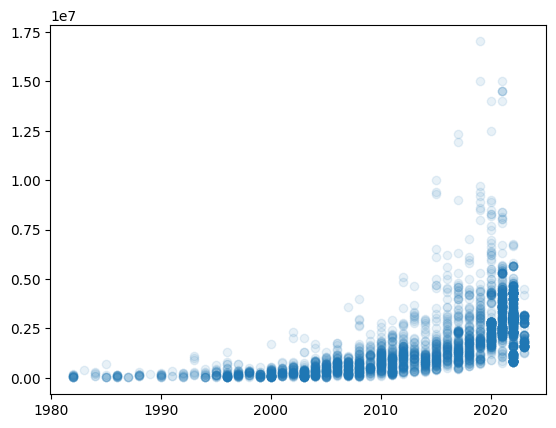

In [23]:
plt.scatter(ds['year'], ds['price'], alpha=0.1)

Очевидно, что новые автомобили стоят дороже, чем старые. При этом и разброс значений цены для новых автомобилей выше: с возрастом стоимость изначально дорогого автомобиля становится всё ближе к стоимости изначально дешёвого. При этом можно наблюдать, что большинство продаваемых автомобилей были выпущены в XI-ом веке, а диапазон цен тех, что были выпущены раньше, схлопывается буквально в прямую.

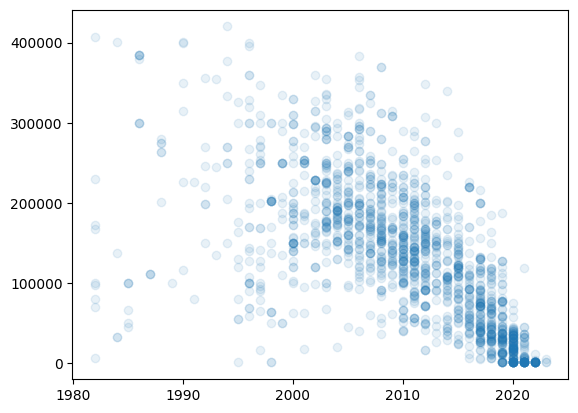

In [24]:
plt.scatter(ds['year'], ds['mileage'], alpha=0.1)

Также из очевидного: похожая на прямопропорциональную зависимость пробега от возраста автомобиля. Хотя есть и немало исключений.

Теперь обратим внимание и на категориальные признаки.

<Axes: xlabel='fuelType', ylabel='price'>

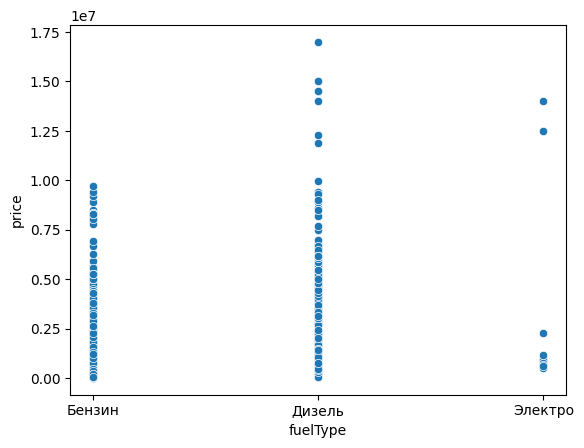

In [25]:
sns.scatterplot(data=ds, x='fuelType', y='price')

Дизельные автомобили имеют гораздо больший разброс по ценам, нежели бензиновые. А электрических автомобилей - просто слишком мало. Избавимся от двух выделяющихся электромобилей.

<Axes: xlabel='fuelType', ylabel='price'>

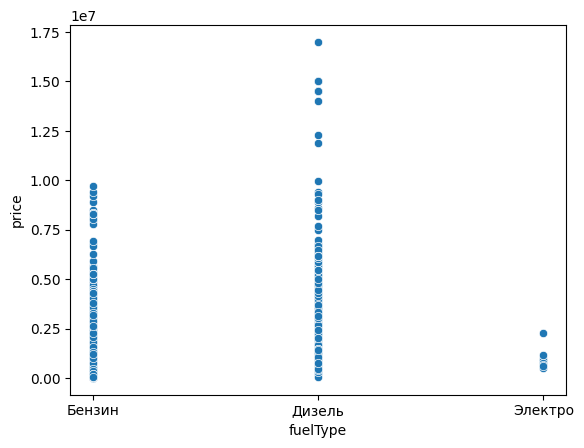

In [26]:
ds = ds.drop(ds[(ds.price > 10000000) & (ds.fuelType == 'Электро')].index)
sns.scatterplot(data=ds, x='fuelType', y='price')

Так лучше. Посмотрим аналогичную визаулизацию по типу кузова.

<Axes: xlabel='bodyType', ylabel='price'>

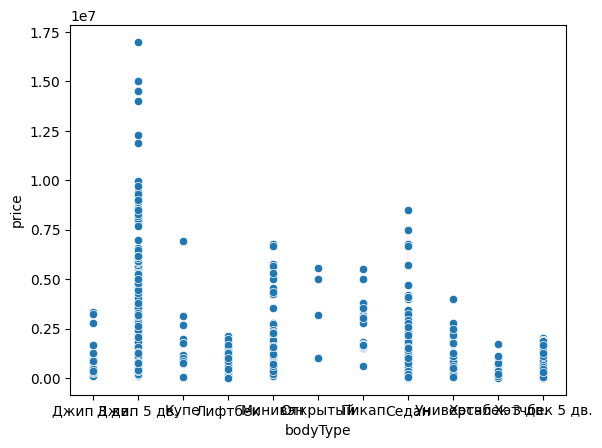

In [27]:
sns.scatterplot(data=ds, x='bodyType', y='price')

Самый большой разброс цен имеют больше автомобили: минивэны и пятидверные внедорожники, в то время как, например, цены на хэтчбеки сосредоточены в достаточно узком диапазоне.

Посмотрим на автомобильные бренды.

In [28]:
uniq_brands = np.unique(ds['brand'].to_numpy(), return_counts=True)
brands, nums = list(uniq_brands[0]), list(uniq_brands[1])
sorted_brands = sorted([(brands[i], nums[i]) for i in range(len(brands))], key=lambda x: -x[1])
sorted_brands

[('Chery', 645),
 ('Лада', 552),
 ('Hyundai', 279),
 ('Haval', 233),
 ('Kia', 202),
 ('Toyota', 157),
 ('УАЗ', 126),
 ('Nissan', 106),
 ('EXEED', 95),
 ('Renault', 94),
 ('Ford', 91),
 ('Changan', 87),
 ('Chevrolet', 86),
 ('Audi', 85),
 ('OMODA', 79),
 ('Mercedes-Benz', 78),
 ('Volkswagen', 78),
 ('Geely', 77),
 ('Mitsubishi', 71),
 ('BMW', 70),
 ('Mazda', 63),
 ('Honda', 46),
 ('Suzuki', 43),
 ('Skoda', 31),
 ('Lexus', 27),
 ('Lifan', 25),
 ('Opel', 25),
 ('Great Wall', 24),
 ('Peugeot', 24),
 ('Volvo', 24),
 ('Subaru', 22),
 ('ГАЗ', 22),
 ('Jeep', 21),
 ('Land Rover', 20),
 ('Citroen', 18),
 ('Daewoo', 14),
 ('SsangYong', 14),
 ('Infiniti', 10),
 ('Datsun', 8),
 ('ЗАЗ', 8),
 ('Chrysler', 7),
 ('Fiat', 6),
 ('JAC', 6),
 ('Dongfeng', 5),
 ('Jaguar', 5),
 ('Porsche', 5),
 ('ИЖ', 4),
 ('Dodge', 3),
 ('GAC', 3),
 ('Ravon', 3),
 ('Rover', 3),
 ('Москвич', 3),
 ('Cadillac', 2),
 ('Genesis', 2),
 ('MINI', 2),
 ('ТагАЗ', 2),
 ('Alfa Romeo', 1),
 ('Daihatsu', 1),
 ('Isuzu', 1),
 ('Kaiyi', 1),

Удалим из списка брендов те, представители которых встречаются менее 10 раз: будем считать эти автомобили редкими.

In [29]:
sorted_brands = sorted_brands[:38]
sorted_brands

[('Chery', 645),
 ('Лада', 552),
 ('Hyundai', 279),
 ('Haval', 233),
 ('Kia', 202),
 ('Toyota', 157),
 ('УАЗ', 126),
 ('Nissan', 106),
 ('EXEED', 95),
 ('Renault', 94),
 ('Ford', 91),
 ('Changan', 87),
 ('Chevrolet', 86),
 ('Audi', 85),
 ('OMODA', 79),
 ('Mercedes-Benz', 78),
 ('Volkswagen', 78),
 ('Geely', 77),
 ('Mitsubishi', 71),
 ('BMW', 70),
 ('Mazda', 63),
 ('Honda', 46),
 ('Suzuki', 43),
 ('Skoda', 31),
 ('Lexus', 27),
 ('Lifan', 25),
 ('Opel', 25),
 ('Great Wall', 24),
 ('Peugeot', 24),
 ('Volvo', 24),
 ('Subaru', 22),
 ('ГАЗ', 22),
 ('Jeep', 21),
 ('Land Rover', 20),
 ('Citroen', 18),
 ('Daewoo', 14),
 ('SsangYong', 14),
 ('Infiniti', 10)]

In [30]:
brands = {brand[0]: brand[1] for brand in sorted_brands}
brands

{'Chery': 645,
 'Лада': 552,
 'Hyundai': 279,
 'Haval': 233,
 'Kia': 202,
 'Toyota': 157,
 'УАЗ': 126,
 'Nissan': 106,
 'EXEED': 95,
 'Renault': 94,
 'Ford': 91,
 'Changan': 87,
 'Chevrolet': 86,
 'Audi': 85,
 'OMODA': 79,
 'Mercedes-Benz': 78,
 'Volkswagen': 78,
 'Geely': 77,
 'Mitsubishi': 71,
 'BMW': 70,
 'Mazda': 63,
 'Honda': 46,
 'Suzuki': 43,
 'Skoda': 31,
 'Lexus': 27,
 'Lifan': 25,
 'Opel': 25,
 'Great Wall': 24,
 'Peugeot': 24,
 'Volvo': 24,
 'Subaru': 22,
 'ГАЗ': 22,
 'Jeep': 21,
 'Land Rover': 20,
 'Citroen': 18,
 'Daewoo': 14,
 'SsangYong': 14,
 'Infiniti': 10}

In [31]:
cond = 'brand == "Лада"'
for i in brands:
    cond += f' or brand == "{i}"' 
ds = ds.query(cond)
ds.reset_index(drop=True, inplace=True)
ds

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Лада,Нива Тревел,Джип 5 дв.,Зеленый,Бензин,2022,NaN,Механика,80.0,1209900.0,1.7 MT Black’22,ВАЗ-2123,1.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,NaN,2023-05-01 23:00:00
1,Toyota,Probox,Универсал,Белый,Бензин,2018,104000.0,Вариатор,109.0,1140000.0,1.5 GL,1NZ-FE,1.5,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00
2,Kia,Ceed,Универсал,Синий,Бензин,2021,25000.0,АКПП,128.0,2090000.0,1.6 AT Comfort,G4FG,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cee~d/506...,В продаже Kia Ceed 2021 г. 1 собственник Ориги...,2023-05-01 23:00:00
3,Lifan,X60,Джип 5 дв.,Серебристый,Бензин,2017,27000.0,Механика,128.0,1150000.0,1.8 MT Comfort,LFB479Q,1.8,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lifan/x60/506...,В продаже Lifan X60 2018 г. 1 собственник Ориг...,2023-05-01 23:00:00
4,Kia,Cerato,Седан,Серый,Бензин,2012,140000.0,Механика,126.0,600000.0,1.6 MT Comfort,G4FC,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cerato/50...,Автомобиль в хорошем состоянии. Технически без...,2023-05-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,Toyota,Cresta,Седан,Белый,Бензин,1997,NaN,АКПП,140.0,199999.0,2.0 Super Lucent,1G-FE,2.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/cresta...,"После дтп, повреждена левая передняя сторона. ...",2023-06-21 15:00:00
3760,Chery,Tiggo 7 Pro,Джип 5 дв.,Красный,Бензин,2020,NaN,Вариатор,147.0,2650000.0,1.5 CVT Prestige,SQRE4T15C,1.5,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,Куплен у официального дилера в Нижнем Новгород...,2023-06-21 15:00:00
3761,Kia,Mohave,Джип 5 дв.,Серый,Дизель,2020,NaN,АКПП,249.0,6190000.0,3.0 AT 4WD Premium,D6EB,3.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/mohave/50...,Добрый день.В НАЛИЧИИ АБСОЛЮТНО НОВЫЙ .KIA MOH...,2023-06-21 20:00:00
3762,Лада,2115 Самара,Седан,Зеленый,Бензин,2007,NaN,Механика,81.0,215000.0,1.6 MT 21154-20-010,ВАЗ-21114,1.6,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/2115/514...,Продаю 2115 в достойном состоянии как по кузов...,2023-06-21 20:00:00


Теперь посмотрим некоторую статистику для самых популярных брендов.

In [32]:
top_brands = {brand[0]: brand[1] for brand in sorted_brands[:10]}
top_brands

{'Chery': 645,
 'Лада': 552,
 'Hyundai': 279,
 'Haval': 233,
 'Kia': 202,
 'Toyota': 157,
 'УАЗ': 126,
 'Nissan': 106,
 'EXEED': 95,
 'Renault': 94}

Узнаем сренюю стоимость автомобилей самых популярных марок:

{'Chery': 3056937.004651163, 'Лада': 443073.56702898553, 'Hyundai': 2424777.4982078853, 'Haval': 2726665.236051502, 'Kia': 1714995.9405940594, 'Toyota': 2562464.2101910827, 'УАЗ': 1663725.238095238, 'Nissan': 965415.2547169811, 'EXEED': 4216707.368421053, 'Renault': 1137127.2021276595}


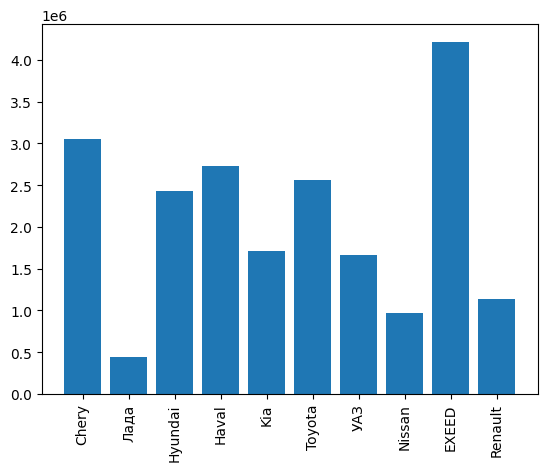

In [33]:
top_prices = {brand: ds[ds.brand == brand]['price'].mean() for brand in top_brands}
print(top_prices)
plt.bar(range(len(top_prices)), list(top_prices.values()), align='center')
plt.xticks(range(len(top_prices)), list(top_prices.keys()), rotation='vertical')
plt.show()

Ожидаемо, что средняя цена на `Лады` самая низкая. А вот с самыми высокими ценами - возможно, для кого-то удивительно: лидер - китаец. Но учитывая, что это премиальный китаец, а солидные европейские и японские бренды нынче в топ не входят, это тоже достаточно понятно

<Axes: xlabel='power', ylabel='price'>

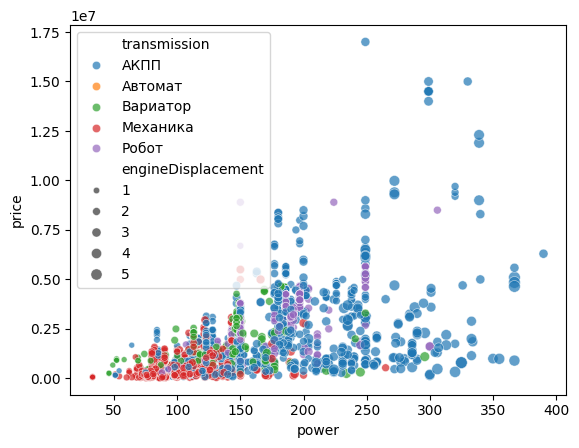

In [34]:
sns.scatterplot(x='power', y='price', size='engineDisplacement', hue='transmission', data=ds, alpha=0.7)

Интересные зависимости цены от объёма мощности автомобиля, типа коробки передач и обёма двигателя. Автомобили на механике в основном сконцентрированы в области до 2 млн рублей, тогда как автомобили на автомате разбросаны по всему ценовому диапазону. Размер кружков, соответствующий объёму двигателя, увеличивается с перемещением вверх по оси цены, так же как и с ростом мощности автомобиля ценовой разброс увеличивается.

Кстати, можно заметить на легегде отличные значения `transmission` `АКПП` и `Автомат`, хотя на деле это одно и то же. Приведём к общему знаменателю.

In [35]:
ds['transmission'].value_counts()

transmission
Механика    1277
АКПП        1065
Робот        777
Вариатор     645
Автомат        0
Name: count, dtype: int64

In [36]:
ds['transmission'] = ds['transmission'].cat.remove_categories('Автомат')
ds['transmission'].value_counts()

transmission
Механика    1277
АКПП        1065
Робот        777
Вариатор     645
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


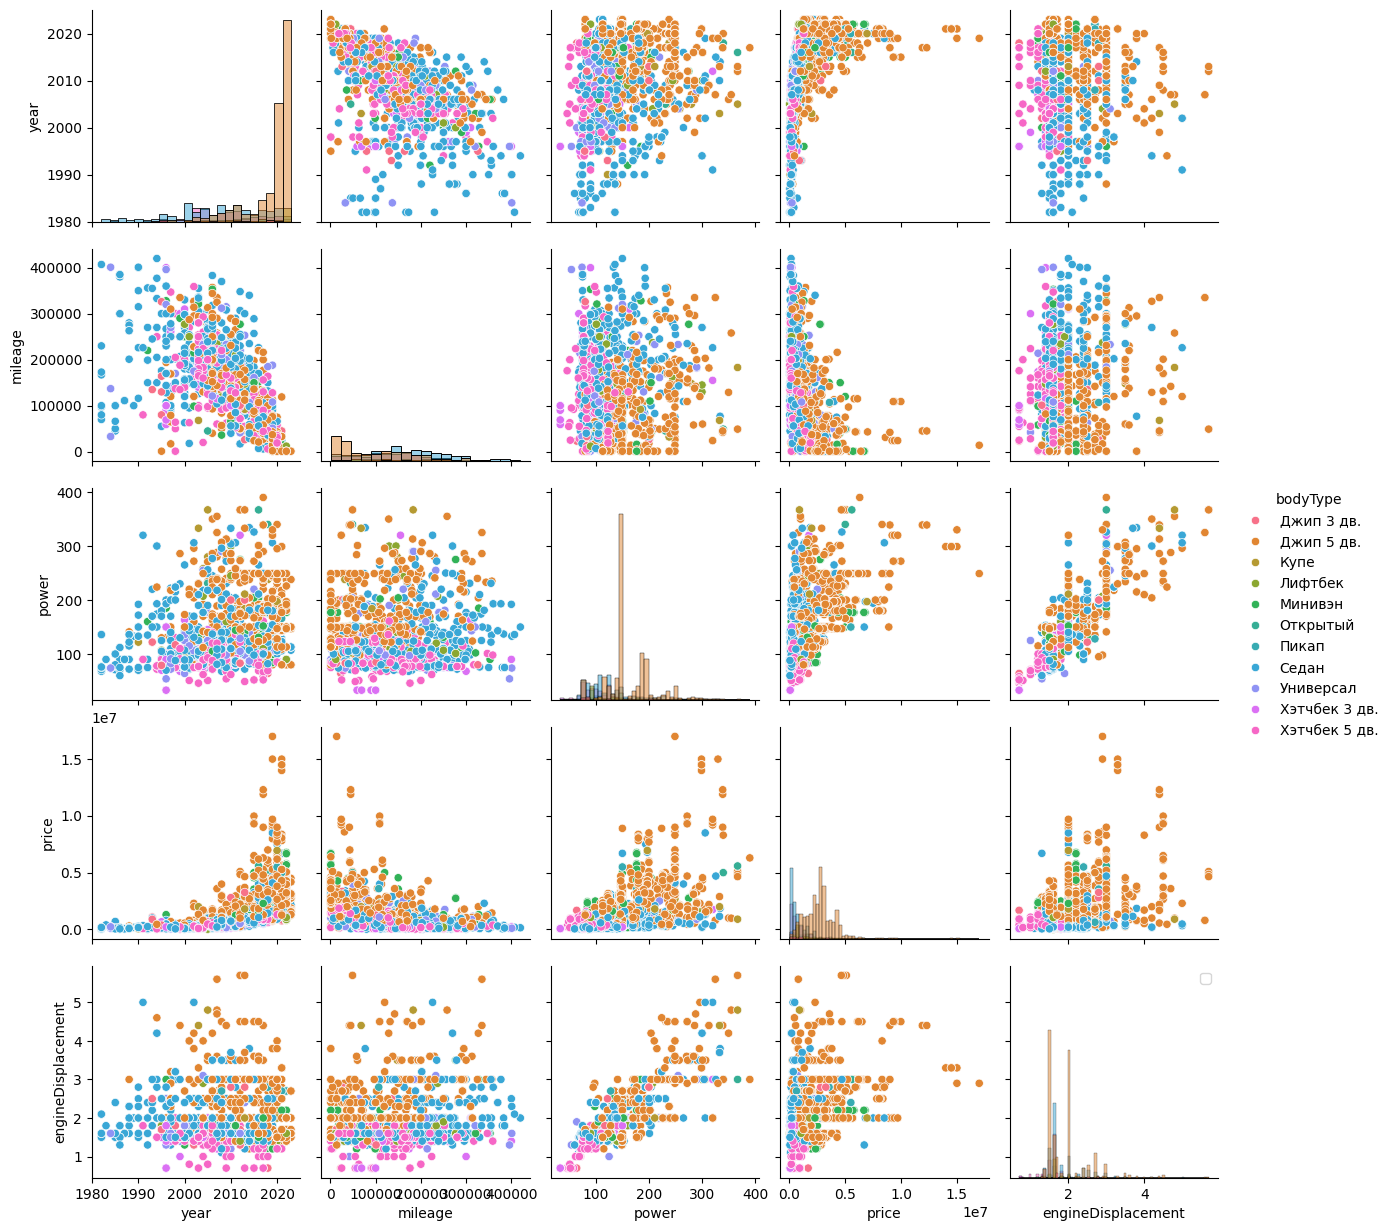

In [37]:
sns.pairplot(ds, hue='bodyType', diag_kind='hist')
plt.legend()

На диаграмма хорошо видна корреляция, помимо явных связей многих признаком с ценой, между `power` и `enhineDisplacement`, а также между `year` и `mileage`.

Посмотрим на гистограмму для цены (которая, как и гистограммы для остальных количественных признаков, фигурируют на диагонали матрицы выше) отдельно:

C:\Users\User\AppData\Local\Temp\ipykernel_1012\2480350234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['price'], bins=20)


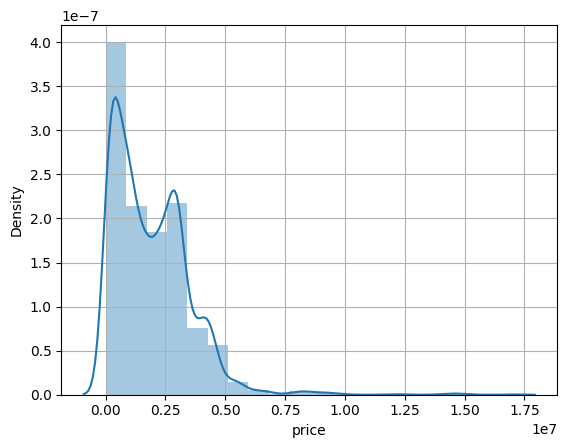

In [38]:
sns.distplot(ds['price'], bins=20)
plt.grid()

Значения цен "сгружены" в диапазоне эконом-сегмента.

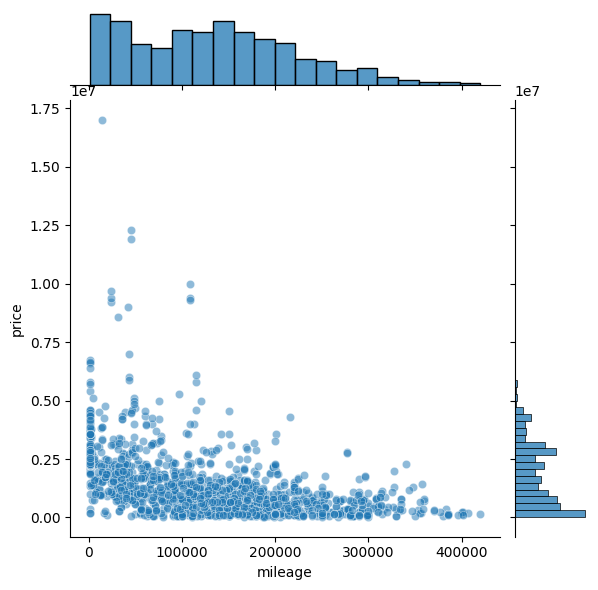

In [39]:
sns.jointplot(x='mileage', y='price', alpha=.5, data=ds)

Диаграмма рассеивания и гистограммы для цены и пробега. Большинство автомобилей продаются с пробегом 100-200 тыс. км, однако большое количество автомобилей продаются "почти новыми". Очевидно, для последних цена в среднем выше, что видно из диаграммы рассеивания.

<Axes: xlabel='fuelType', ylabel='price'>

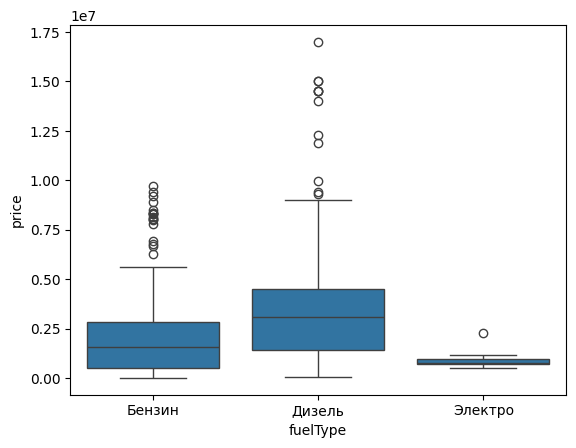

In [40]:
sns.boxplot(x='fuelType', y='price', data=ds)

Ящик с усами для цены по полю `fuelType`. Видно, насколько силён размах цен дизельных автомобилей и насколько мал размах цен электромобилей. Причём для бензиновых автомобилей медиана находится в нижней части "ящика", т.е. у более дорогих автомобилей более сильный разброс цен, нежели у недорогих.

<Axes: xlabel='transmission', ylabel='price'>

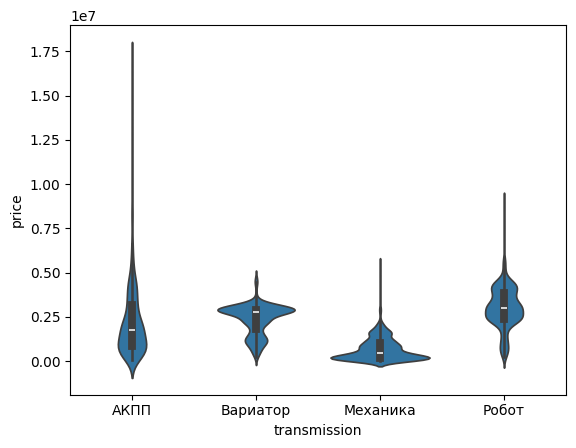

In [41]:
sns.violinplot(x='transmission', y='price', data=ds.drop(ds[ds.transmission == 'Автомат'].index))

Также характер распределения цен для одного из параметров (в данном случае - `tranmission`) мы можем наблюдать на скрипичном графике.

Вычислим матрицу корреляции для количественных признаков:

In [42]:
cor_mat = ds.corr(numeric_only=True)
cor_mat

,year,mileage,power,price,engineDisplacement
year,1.000000,-0.660048,0.294867,0.642634,-0.070698
mileage,-0.660048,1.000000,-0.000233,-0.478133,0.129717
power,0.294867,-0.000233,1.000000,0.634048,0.700685
price,0.642634,-0.478133,0.634048,1.000000,0.230792
engineDisplacement,-0.070698,0.129717,0.700685,0.230792,1.000000


Теперь в графическом виде:

<Axes: >

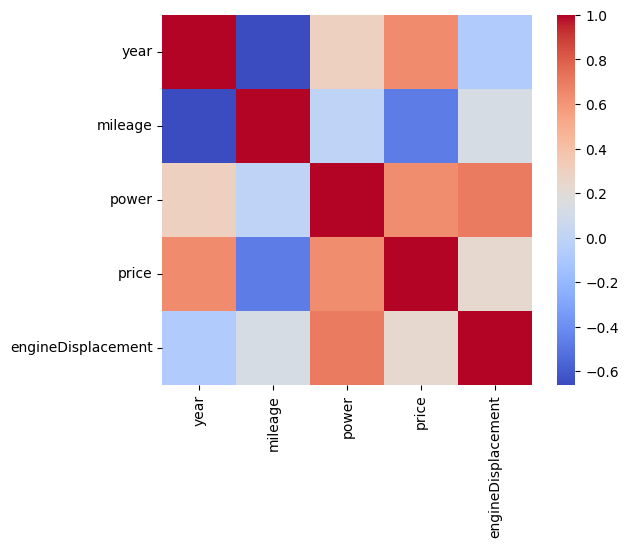

In [43]:
sns.heatmap(cor_mat, square=True, cmap='coolwarm')

Судя по матрице корреляции, больше всего коррелируют год выпуска с ценой, мощность двигателя с его объёмом. Год и пробег коррелируют так же сильно, но зависимость уже обратная. А вот пробег и объём двигателя практически не зависят друг от друга.

Посмторим на количество автомобилей в выборке с тем или иным типом трансмссии:

<Axes: xlabel='transmission', ylabel='count'>

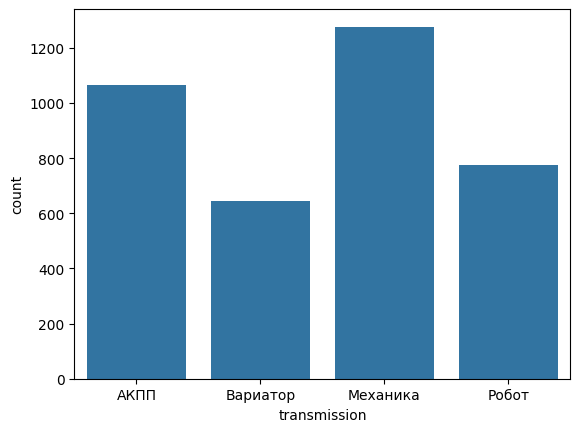

In [44]:
sns.countplot(x='transmission', data=ds)

А теперь средний значения цен автомобилей для них же:

<Axes: xlabel='transmission', ylabel='price'>

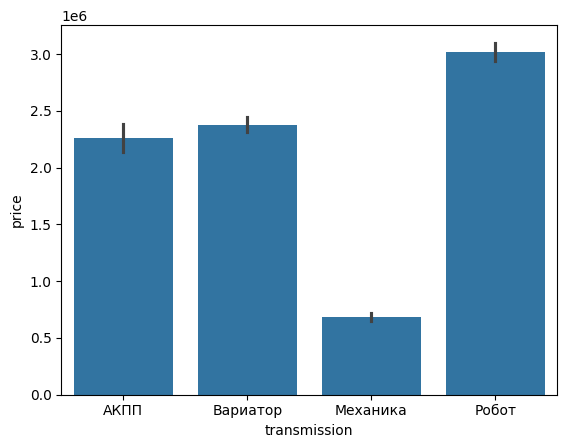

In [45]:
sns.barplot(x='transmission', y='price', data=ds)

Получается, автомобили на механике в среднем намного дешевле автомобилей с различными разновидностями автоматической коробки.

Посмотрим, как влияет на цену автомобиля его цвет:

<Axes: xlabel='color', ylabel='price'>

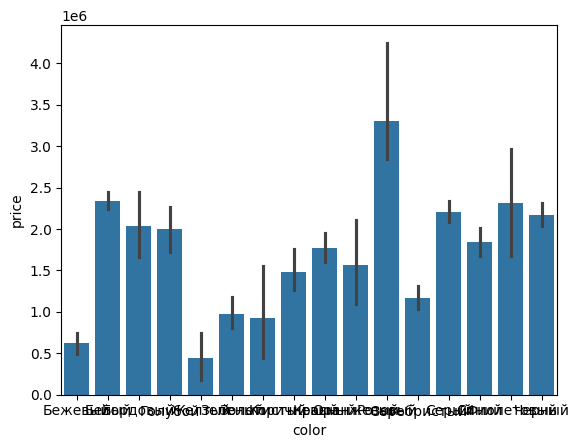

In [46]:
sns.barplot(x='color', y='price', data=ds)

In [47]:
ds.query('color == "Розовый"')

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
1690,Chery,Tiggo 7 Pro,Джип 5 дв.,Розовый,Бензин,2020,NaN,Вариатор,147.0,2839000.0,1.5 CVT Prestige,SQRE4T15C,1.5,2023-05-18,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,Кроссоверы Chery с государственной поддержкой ...,2023-05-24 11:00:00
1792,EXEED,TXL,Джип 5 дв.,Розовый,Бензин,2021,NaN,Робот,186.0,4249900.0,1.6 DCT AWD Flagship,SQRF4J16,1.6,2023-05-20,Нижний Новгород,https://nizhniy-novgorod.drom.ru/cheryexeed/tx...,"Купите EXEED в кредит по ставке 0,01% сроком д...",2023-05-26 22:00:00
3604,Chery,Tiggo 7 Pro,Джип 5 дв.,Розовый,Бензин,2020,NaN,Вариатор,147.0,2839900.0,1.5 CVT Prestige,SQRE4T15C,1.5,2023-06-18,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,РАССРОЧКА НА КРОССОВЕРЫ CHERY ДО 7 ЛЕТ. Только...,2023-06-18 20:00:00


Сильно выделсяется розовый, причём таких всего 3 автомобиля. Удалим эти записи как выбросы.

In [48]:
ds = ds.query('color != "Розовый"')
ds.reset_index(drop=True, inplace=True)
ds

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Лада,Нива Тревел,Джип 5 дв.,Зеленый,Бензин,2022,NaN,Механика,80.0,1209900.0,1.7 MT Black’22,ВАЗ-2123,1.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,NaN,2023-05-01 23:00:00
1,Toyota,Probox,Универсал,Белый,Бензин,2018,104000.0,Вариатор,109.0,1140000.0,1.5 GL,1NZ-FE,1.5,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00
2,Kia,Ceed,Универсал,Синий,Бензин,2021,25000.0,АКПП,128.0,2090000.0,1.6 AT Comfort,G4FG,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cee~d/506...,В продаже Kia Ceed 2021 г. 1 собственник Ориги...,2023-05-01 23:00:00
3,Lifan,X60,Джип 5 дв.,Серебристый,Бензин,2017,27000.0,Механика,128.0,1150000.0,1.8 MT Comfort,LFB479Q,1.8,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lifan/x60/506...,В продаже Lifan X60 2018 г. 1 собственник Ориг...,2023-05-01 23:00:00
4,Kia,Cerato,Седан,Серый,Бензин,2012,140000.0,Механика,126.0,600000.0,1.6 MT Comfort,G4FC,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cerato/50...,Автомобиль в хорошем состоянии. Технически без...,2023-05-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,Toyota,Cresta,Седан,Белый,Бензин,1997,NaN,АКПП,140.0,199999.0,2.0 Super Lucent,1G-FE,2.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/cresta...,"После дтп, повреждена левая передняя сторона. ...",2023-06-21 15:00:00
3757,Chery,Tiggo 7 Pro,Джип 5 дв.,Красный,Бензин,2020,NaN,Вариатор,147.0,2650000.0,1.5 CVT Prestige,SQRE4T15C,1.5,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,Куплен у официального дилера в Нижнем Новгород...,2023-06-21 15:00:00
3758,Kia,Mohave,Джип 5 дв.,Серый,Дизель,2020,NaN,АКПП,249.0,6190000.0,3.0 AT 4WD Premium,D6EB,3.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/mohave/50...,Добрый день.В НАЛИЧИИ АБСОЛЮТНО НОВЫЙ .KIA MOH...,2023-06-21 20:00:00
3759,Лада,2115 Самара,Седан,Зеленый,Бензин,2007,NaN,Механика,81.0,215000.0,1.6 MT 21154-20-010,ВАЗ-21114,1.6,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/2115/514...,Продаю 2115 в достойном состоянии как по кузов...,2023-06-21 20:00:00


In [49]:
ds['color'].value_counts()

color
Белый          778
Черный         751
Серый          623
Серебристый    309
Синий          309
Красный        232
Зеленый        155
Коричневый      92
Бордовый        81
Голубой         80
Бежевый         52
Оранжевый       28
Фиолетовый      25
Золотистый      13
Желтый           7
Розовый          0
Name: count, dtype: int64

Получим также статистику по типу двигателя:

<Axes: xlabel='fuelType', ylabel='count'>

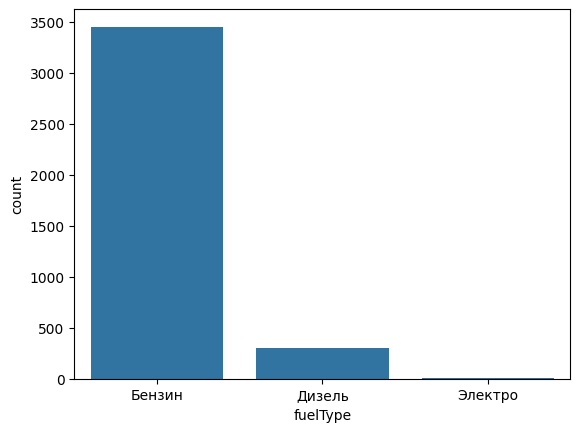

In [50]:
sns.countplot(x='fuelType', data=ds)

## Обработка пропущенных значений

Посмотрим ещё раз, значения каких признаков и в каком количестве у нас пропущены:

In [51]:
ds.isna().sum()

brand                      0
name                       0
bodyType                   0
color                    226
fuelType                   0
year                       0
mileage                 2178
transmission               0
power                     11
price                      0
vehicleConfiguration       0
engineName                25
engineDisplacement        36
date                       0
location                   0
link                       0
description              441
parse_date                 0
dtype: int64

Имеется достаточно немалое количество пропущенных значений, причём для разнородных признаков. Пойдём по очереди.

`color`. Пропущенные цвета заполним значением `Черный`, т.к. это самый популярный цвет и в принципе по средней цене не выделяется среди остальных цветов.

Для числовых признаков `mileage`, `power`, `engineDisplacement` пропущенные значения заполним средними.

`engineName` - не самый влиятельный признак. Заменим пропущенные значения на `N/A`, добавив новую категорию.

Пропущенные значения текстового признака `description` будем заполнять пустым описанием.

In [52]:
ds['color'] = ds['color'].fillna(value='Черный')

for sign in ['mileage', 'power', 'engineDisplacement']:
    ds[sign] = ds[sign].fillna(value=ds[sign].mean())

ds['engineName'] = ds['engineName'].cat.add_categories('N/A')
ds['engineName'] = ds['engineName'].fillna(value='N/A')

ds['description'] = ds['description'].fillna(value='')

ds.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_1012\3656041277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['color'] = ds['color'].fillna(value='Черный')
C:\Users\User\AppData\Local\Temp\ipykernel_1012\3656041277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[sign] = ds[sign].fillna(value=ds[sign].mean())
C:\Users\User\AppData\Local\Temp\ipykernel_1012\3656041277.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

brand                   0
name                    0
bodyType                0
color                   0
fuelType                0
year                    0
mileage                 0
transmission            0
power                   0
price                   0
vehicleConfiguration    0
engineName              0
engineDisplacement      0
date                    0
location                0
link                    0
description             0
parse_date              0
dtype: int64

Теперь пропущенных значений нет.

In [53]:
ds

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Лада,Нива Тревел,Джип 5 дв.,Зеленый,Бензин,2022,133761.212887,Механика,80.0,1209900.0,1.7 MT Black’22,ВАЗ-2123,1.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,,2023-05-01 23:00:00
1,Toyota,Probox,Универсал,Белый,Бензин,2018,104000.000000,Вариатор,109.0,1140000.0,1.5 GL,1NZ-FE,1.5,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00
2,Kia,Ceed,Универсал,Синий,Бензин,2021,25000.000000,АКПП,128.0,2090000.0,1.6 AT Comfort,G4FG,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cee~d/506...,В продаже Kia Ceed 2021 г. 1 собственник Ориги...,2023-05-01 23:00:00
3,Lifan,X60,Джип 5 дв.,Серебристый,Бензин,2017,27000.000000,Механика,128.0,1150000.0,1.8 MT Comfort,LFB479Q,1.8,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lifan/x60/506...,В продаже Lifan X60 2018 г. 1 собственник Ориг...,2023-05-01 23:00:00
4,Kia,Cerato,Седан,Серый,Бензин,2012,140000.000000,Механика,126.0,600000.0,1.6 MT Comfort,G4FC,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cerato/50...,Автомобиль в хорошем состоянии. Технически без...,2023-05-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,Toyota,Cresta,Седан,Белый,Бензин,1997,133761.212887,АКПП,140.0,199999.0,2.0 Super Lucent,1G-FE,2.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/cresta...,"После дтп, повреждена левая передняя сторона. ...",2023-06-21 15:00:00
3757,Chery,Tiggo 7 Pro,Джип 5 дв.,Красный,Бензин,2020,133761.212887,Вариатор,147.0,2650000.0,1.5 CVT Prestige,SQRE4T15C,1.5,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,Куплен у официального дилера в Нижнем Новгород...,2023-06-21 15:00:00
3758,Kia,Mohave,Джип 5 дв.,Серый,Дизель,2020,133761.212887,АКПП,249.0,6190000.0,3.0 AT 4WD Premium,D6EB,3.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/mohave/50...,Добрый день.В НАЛИЧИИ АБСОЛЮТНО НОВЫЙ .KIA MOH...,2023-06-21 20:00:00
3759,Лада,2115 Самара,Седан,Зеленый,Бензин,2007,133761.212887,Механика,81.0,215000.0,1.6 MT 21154-20-010,ВАЗ-21114,1.6,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/2115/514...,Продаю 2115 в достойном состоянии как по кузов...,2023-06-21 20:00:00


## Обработка категориальных признаков

Для начала "почистим" категориальные признаки от "пустых" категорий.

In [54]:
ds['color'] = ds['color'].cat.remove_categories('Розовый')
ds['color'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_1012\3475429473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['color'] = ds['color'].cat.remove_categories('Розовый')


color
Черный         977
Белый          778
Серый          623
Серебристый    309
Синий          309
Красный        232
Зеленый        155
Коричневый      92
Бордовый        81
Голубой         80
Бежевый         52
Оранжевый       28
Фиолетовый      25
Золотистый      13
Желтый           7
Name: count, dtype: int64

In [55]:
signs_to_delete = ['brand', 'name', 'vehicleConfiguration']
for sign in signs_to_delete:
    cats, nums = ds[sign].value_counts().index.to_list(), ds[sign].value_counts().values
    cats_and_nums = {cats[i]: nums[i] for i in range(len(cats))}
    for k, v in cats_and_nums.items():
        if v == 0:
            ds[sign] = ds[sign].cat.remove_categories(k)

C:\Users\User\AppData\Local\Temp\ipykernel_1012\37114743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[sign] = ds[sign].cat.remove_categories(k)
C:\Users\User\AppData\Local\Temp\ipykernel_1012\37114743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[sign] = ds[sign].cat.remove_categories(k)
C:\Users\User\AppData\Local\Temp\ipykernel_1012\37114743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Немного заглядывая в будущее, можно сказать, что бинаризация таких признаков, как `name`, `vehicleConfiguration`, `engineName`, `color`, которые имеют огромное количество уникальных значений, с последующим запуском линейной регрессии не приведут к адеватному решению. Поэтому эмпирическим путём выяснено, что без учёта этих признаков (именно в таком виде) результаты получаются просто-напросто лучше. Удалим их.

И проведём бинаризацию остальных категориальных признаков:

In [56]:
ds.drop(['name', 'vehicleConfiguration', 'engineName', 'color'], axis=1 , inplace=True)
categorial_signs = ['bodyType', 'fuelType', 'transmission', 'brand']
for sign in categorial_signs:
    dummies = pd.get_dummies(ds[sign])
    dummies.head()
    ds = pd.concat((ds, dummies), axis=1)
    ds = ds.drop([sign], axis=1)
ds

C:\Users\User\AppData\Local\Temp\ipykernel_1012\1373829286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(['name', 'vehicleConfiguration', 'engineName', 'color'], axis=1 , inplace=True)


,year,mileage,power,price,engineDisplacement,date,location,link,description,parse_date,...,Skoda,SsangYong,Subaru,Suzuki,Toyota,Volkswagen,Volvo,ГАЗ,Лада,УАЗ
0,2022,133761.212887,80.0,1209900.0,1.7,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/niva_tra...,,2023-05-01 23:00:00,...,False,False,False,False,False,False,False,False,True,False
1,2018,104000.000000,109.0,1140000.0,1.5,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/probox...,"Отличная, рабочая лошадка. Мечта колхозника. Г...",2023-05-01 23:00:00,...,False,False,False,False,True,False,False,False,False,False
2,2021,25000.000000,128.0,2090000.0,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cee~d/506...,В продаже Kia Ceed 2021 г. 1 собственник Ориги...,2023-05-01 23:00:00,...,False,False,False,False,False,False,False,False,False,False
3,2017,27000.000000,128.0,1150000.0,1.8,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lifan/x60/506...,В продаже Lifan X60 2018 г. 1 собственник Ориг...,2023-05-01 23:00:00,...,False,False,False,False,False,False,False,False,False,False
4,2012,140000.000000,126.0,600000.0,1.6,2023-04-22,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/cerato/50...,Автомобиль в хорошем состоянии. Технически без...,2023-05-01 23:00:00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,1997,133761.212887,140.0,199999.0,2.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/toyota/cresta...,"После дтп, повреждена левая передняя сторона. ...",2023-06-21 15:00:00,...,False,False,False,False,True,False,False,False,False,False
3757,2020,133761.212887,147.0,2650000.0,1.5,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/chery/tiggo_7...,Куплен у официального дилера в Нижнем Новгород...,2023-06-21 15:00:00,...,False,False,False,False,False,False,False,False,False,False
3758,2020,133761.212887,249.0,6190000.0,3.0,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/kia/mohave/50...,Добрый день.В НАЛИЧИИ АБСОЛЮТНО НОВЫЙ .KIA MOH...,2023-06-21 20:00:00,...,False,False,False,False,False,False,False,False,False,False
3759,2007,133761.212887,81.0,215000.0,1.6,2023-06-21,Нижний Новгород,https://nizhniy-novgorod.drom.ru/lada/2115/514...,Продаю 2115 в достойном состоянии как по кузов...,2023-06-21 20:00:00,...,False,False,False,False,False,False,False,False,True,False


Теперь имеем таблицу без категориальных признаков и с множеством биномиальных.

## Нормализация количественных признаков

Избавимся от признаков `parse_date`, `location`, `link` и `description` (первый не оказывает влияния на значение целевого признака, второй имеет только одно униклаьное значение, а четвёртый и третий - текстовые). Проведём нормализацию количественных признаков:

In [57]:
ds.drop(['location', 'link', 'description', 'parse_date'], axis=1 , inplace=True)

In [58]:
ds = (ds - ds.mean(axis = 0)) / ds.std(axis = 0)
ds = ds.loc[:,ds.notna().any(axis=0)]
ds

C:\Users\User\AppData\Local\Temp\ipykernel_1012\3291659614.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  ds = (ds - ds.mean(axis = 0)) / ds.std(axis = 0)


,year,mileage,power,price,engineDisplacement,date,Джип 3 дв.,Джип 5 дв.,Купе,Лифтбек,...,Skoda,SsangYong,Subaru,Suzuki,Toyota,Volkswagen,Volvo,ГАЗ,Лада,УАЗ
0,0.876476,0.0,-1.263764,-0.428338,-0.283222,-1.702369,-0.089658,0.913952,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,2.41078,-0.186155
1,0.418655,-0.511926,-0.684644,-0.471585,-0.650946,-1.702369,-0.089658,-1.093859,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,4.790544,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
2,0.762021,-1.870815,-0.305221,0.116178,-0.467084,-1.702369,-0.089658,-1.093859,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
3,0.3042,-1.836412,-0.305221,-0.465398,-0.09936,-1.702369,-0.089658,0.913952,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
4,-0.268077,0.107314,-0.345161,-0.805682,-0.467084,-1.702369,-0.089658,-1.093859,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,-1.984906,0.0,-0.065586,-1.053162,0.268365,1.730175,-0.089658,-1.093859,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,4.790544,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
3757,0.647566,0.0,0.074202,0.46265,-0.650946,1.730175,-0.089658,0.913952,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
3758,0.647566,0.0,2.111105,2.652842,2.106986,1.730175,-0.089658,0.913952,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,-0.414693,-0.186155
3759,-0.840353,0.0,-1.243794,-1.043881,-0.467084,1.730175,-0.089658,-1.093859,-0.065355,-0.1711,...,-0.091153,-0.061117,-0.076697,-0.107528,-0.208689,-0.145509,-0.080128,-0.076697,2.41078,-0.186155


## Разбиение данных на обучающую и тестовую выборки

Разобьём данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая).

In [59]:
x = ds.drop('price', axis=1)
y = ds['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

n_train, _ = x_train.shape 
n_test,  _ = x_test.shape 

n_train, n_test

(2820, 941)

## Запуск линейной регрессии

In [60]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_train_predict = lr_model.predict(x_train)
y_test_predict  = lr_model.predict(x_test)

## Вычисление ошибок на обучающей и тестовой выборках

In [62]:
print(f'Точность R^2 на обучающей выборке: {lr_model.score(x_train, y_train)}')
print(f'Точность R^2 на тестовой выборке: {lr_model.score(x_test, y_test)}')

Точность R^2 на обучающей выборке: 0.7404409177866207
Точность R^2 на тестовой выборке: 0.715365911617023


## Выводы

Результат точности получился не самым высоким. Главная проблема, на мой взгляд, была в обработке категориальных признаков. Путём пробы избавления от "мешающих" признаков удалось добиться точности 74% на обучающей выборке и 72% на тестовой. Могу предположить о нескольких моментах, которые могли бы улучшить результат:
- Обработка категориальных признаков. При простой бинаризации сотни (если не тысячи) моделей автомобилей и двигателей превраща в тысячи признаков, то лишало результаты адекватности. Вероятно, нужная другая стратегия их обработки.
- Каким-либо образом учесть тот факт, что модель всегда относится к одной и той же марке.
- Перевести год выпуска автомобилей в их возраст.
- Сам датасет, как оказалось, содержал, судя по всему, криво распаршенные данные (касается года выпуска, цвета пробега): из-за этого было слишком много пропущенных значений и пришлось отказаться примерно от половины данных
и так далее.

Работу выполнил студент гр. 3822М1ПМад Заятников А.А.

## Продолжение (логичтическая регрессия, случайный лес, нейронная сеть...)

### Случайный лес

In [88]:
from sklearn import ensemble

In [101]:
max_leaf_nodes, max_depth = [3, 6, 9, 12, 15], [3, 6, 9, 12, 15]

Зависимости точностей от двух гиперпараметров:

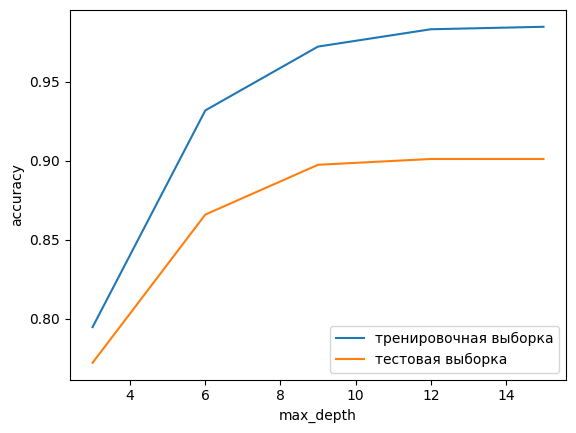

In [106]:
train_accs, test_accs = [], []
for i in max_depth:
    rf_model = ensemble.RandomForestRegressor(max_depth=i)
    rf_model.fit(x_train, y_train)
    train_accs.append(rf_model.score(x_train, y_train))
    test_accs.append(rf_model.score(x_test, y_test))
plt.plot(max_depth, train_accs)
plt.plot(max_depth, test_accs)
plt.gca().set_xlabel('max_depth')
plt.gca().set_ylabel('accuracy')
plt.legend(['тренировочная выборка', 'тестовая выборка'])
plt.show()

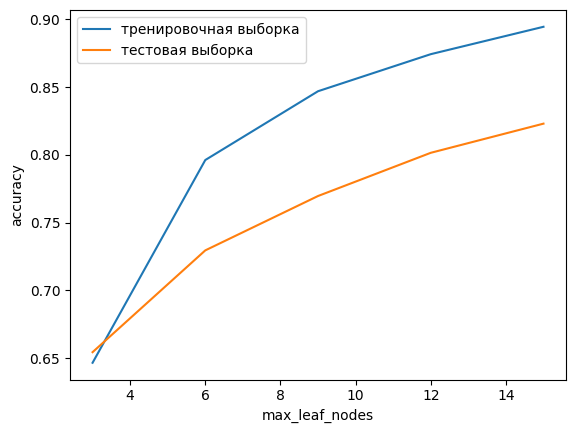

In [107]:
train_accs, test_accs = [], []
for i in max_leaf_nodes:
    rf_model = ensemble.RandomForestRegressor(max_leaf_nodes=i)
    rf_model.fit(x_train, y_train)
    train_accs.append(rf_model.score(x_train, y_train))
    test_accs.append(rf_model.score(x_test, y_test))
plt.plot(max_depth, train_accs)
plt.plot(max_depth, test_accs)
plt.gca().set_xlabel('max_leaf_nodes')
plt.gca().set_ylabel('accuracy')
plt.legend(['тренировочная выборка', 'тестовая выборка'])
plt.show()